In [26]:
import pandas as pd
import numpy as np

file_name_Fe = "concentration_Fe(Sheet1).csv"
output_file_name_Fe = "concentration_Fe_cleaned.csv"

file_name_Cr = "concentration_Cr(Sheet1).csv"
output_file_name_Cr = "concentration_Cr_cleaned.csv"

file_name_MgOH = "concentration_MgOH(Sheet1).csv"
output_file_name_MgOH = "concentration_MgOH_cleaned.csv"

# reading the cvs file
def read_cvs(file_name, output_file_name):
    df = pd.read_csv(
        file_name,
        comment='%',                     # Skips all lines starting with '%' (metadata/header)
        header=None,                     # Reads data rows directly
        names=['r', 'z', 'concentration'], # Assign the known column names
        on_bad_lines='skip'              # Skips any malformed rows
    )

    for col in ['r', 'z', 'concentration']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df_clean = df.dropna(subset=['concentration']).copy()

    df_clean = df_clean.dropna().copy()

    df_clean.to_csv(output_file_name, index=False)

    return output_file_name

read_cvs(file_name_Fe, output_file_name_Fe)
read_cvs(file_name_Cr, output_file_name_Cr)
read_cvs(file_name_MgOH, output_file_name_MgOH)

'concentration_MgOH_cleaned.csv'

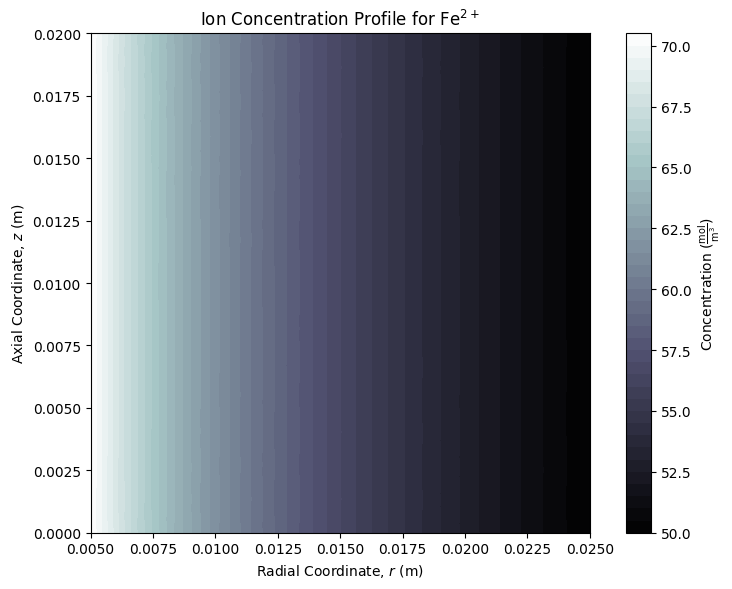

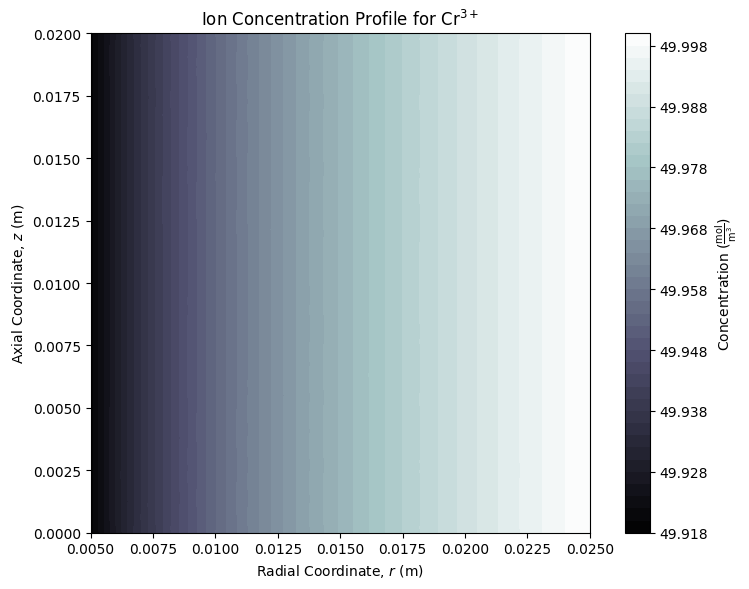

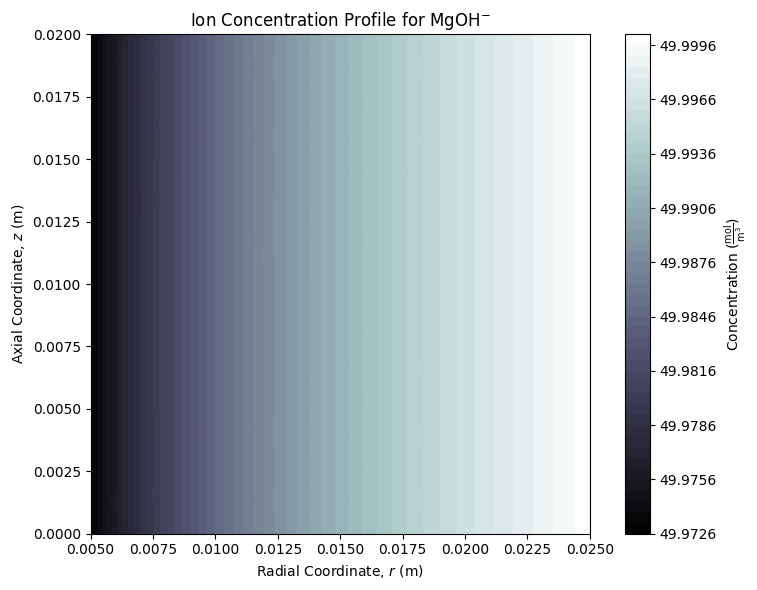

In [49]:
# plotting the cleaned data
import matplotlib.pyplot as plt
import pandas as pd

def plot_concentration_data(file_name, title, cmap='bone', label = 'Concentration ($\\frac{\\text{mol}}{\\text{m}^3}$)'):
    df_clean = pd.read_csv(file_name)

    r = df_clean['r']
    z = df_clean['z']
    concentration = df_clean['concentration']

    fig, ax = plt.subplots(figsize=(8, 6))

    tricontour = ax.tricontourf(r, z, concentration, levels=50, cmap=cmap)

    cbar = fig.colorbar(tricontour, ax=ax, label=label)

    # Set labels and title
    ax.set_xlabel('Radial Coordinate, $r$ (m)')
    ax.set_ylabel('Axial Coordinate, $z$ (m)')
    ax.set_title(f'{title}')
    ax.set_aspect('equal', adjustable='box') 
    plt.tight_layout()
    plt.show()

plot_concentration_data(output_file_name_Fe, 'Ion Concentration Profile for Fe$^{2+}$')
plot_concentration_data(output_file_name_Cr, 'Ion Concentration Profile for Cr$^{3+}$')
plot_concentration_data(output_file_name_MgOH, 'Ion Concentration Profile for MgOH$^{-}$')

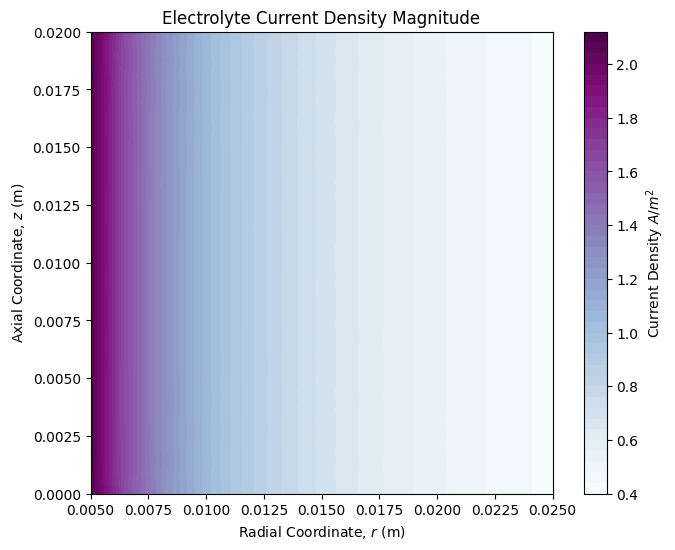

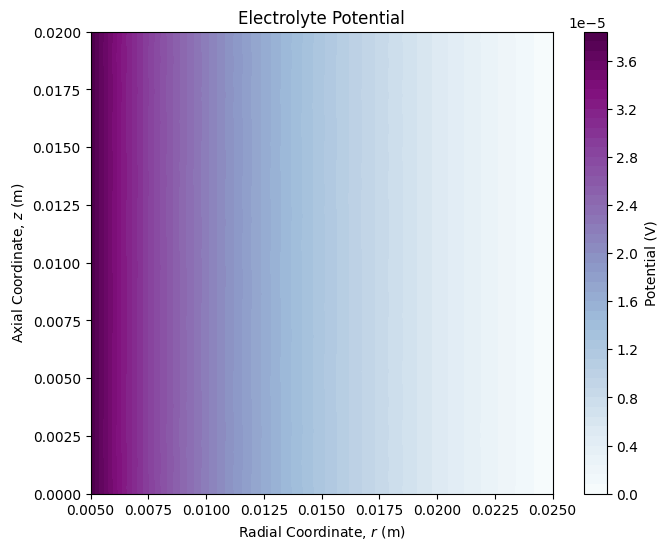

In [44]:
# cleaning and plotting the electrolyte current density magnitude data
cd_mag = "cd_magnitude(Sheet1).csv"
cd_mag_cleaned = "cd_magnitude_cleaned.csv"

read_cvs(cd_mag, cd_mag_cleaned)
plot_concentration_data(cd_mag_cleaned, 'Electrolyte Current Density Magnitude', cmap='BuPu', label = "Current Density $A/m^2$")

# cleaning and plotting the eletrolyte potential data
potential = "phil(Sheet1).csv"
potential_cleaned = "phil_cleaned.csv"
read_cvs(potential, potential_cleaned)
plot_concentration_data(potential_cleaned, 'Electrolyte Potential', cmap='BuPu', label = "Potential (V)")

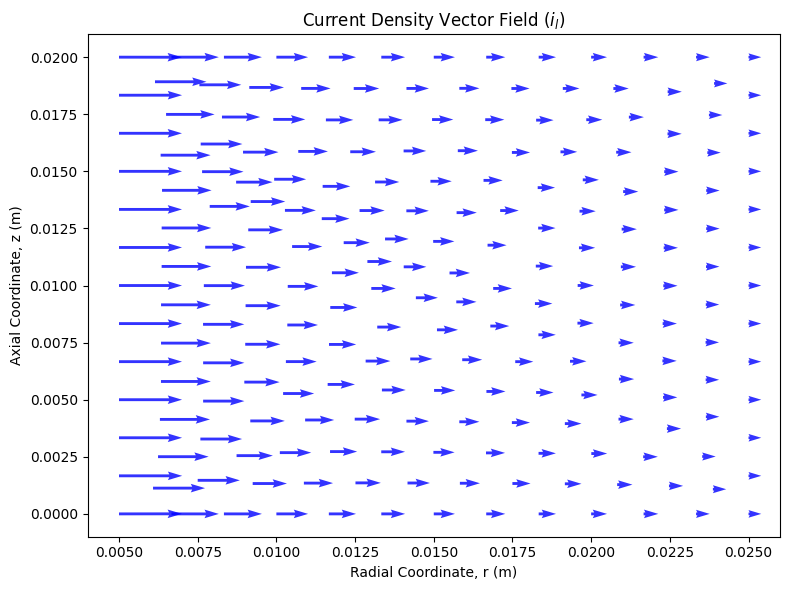

In [ ]:
# plotting the electrolyte current density vector data

# reading and cleaning up the vector data
df_r = pd.read_csv("cd_rvector(Sheet1).csv", comment='%', header=None, names=['r', 'z', 'jr'])
df_z = pd.read_csv("cd_zvector(Sheet1).csv", comment='%', header=None, names=['r', 'z', 'jz'])

df_r = df_r.dropna()
df_z = df_z.dropna()

# merging the two dataframes on r and z to get jr and jz together
df_vec = pd.merge(df_r, df_z, on=['r', 'z'])

plt.figure(figsize=(8, 6))

# plotting vector field
plt.quiver(df_vec['r'], df_vec['z'],  df_vec['jr'],  df_vec['jz'],  color='blue', alpha=0.8)

plt.xlabel('Radial Coordinate, r (m)')
plt.ylabel('Axial Coordinate, z (m)')
plt.title('Current Density Vector Field ($i_l$)')
plt.tight_layout()

Here, I will put all this data together, and calculate the corrosion rate. 



In [ ]:
# cleanign and analyzing the corrosion current density data
df_cd = pd.read_csv("cd_magnitude(Sheet1).csv", comment='%', header=None, names=['r', 'z', 'val'])
df_cd['val'] = pd.to_numeric(df_cd['val'], errors='coerce')
df_cd = df_cd.dropna(subset=['val'])

i_mean = df_cd['val'].mean()
i_max = df_cd['val'].max()   

# Constants for stainless steel
M = 55.845   
n = 2        
rho = 7.85   
F = 96485.3  

# Calculate Corrosion Rate 
i_mean_cm2 = i_mean / 10000
i_max_cm2 = i_max / 10000

cr_mean_cms = (i_mean_cm2 * M) / (n * F * rho)
cr_max_cms = (i_max_cm2 * M) / (n * F * rho)

seconds_per_year = 365.25 * 24 * 3600
cr_mean_mmyr = cr_mean_cms * 10 * seconds_per_year
cr_max_mmyr = cr_max_cms * 10 * seconds_per_year

print(f"Mean Current Density: {i_mean:.4f} A/m^2")
print(f"Max Current Density: {i_max:.4f} A/m^2")
print(f"Mean Corrosion Rate: {cr_mean_mmyr:.4f} mm/year")
print(f"Max Corrosion Rate: {cr_max_mmyr:.4f} mm/year")

Mean Current Density: 0.8825 A/m^2
Max Current Density: 2.1059 A/m^2
Mean Corrosion Rate: 1.0267 mm/year
Max Corrosion Rate: 2.4500 mm/year
